In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import nltk
import string
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from nltk.stem.porter import PorterStemmer
import re

In [5]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [8]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [9]:
## Amazon Fine food reviews data is in sqlite database. so we create a connection and read the data

con=sqlite3.connect('C:/Users/Gaurav/Documents/AAIC/IPYNB/Case Study/Amazon Fine Food Reviews/database.sqlite')

In [10]:
## We consider data for only positive(rating 4,5) and negative(rating 1,2) reviews and filter out neutral reviews(rating 3)

review_data=pd.read_sql_query("""Select * from Reviews Where Score !=3""",con)

In [11]:
review_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
## Change Score column in Positive and Negative Polarity.
## Score>3 is Positive and Score<3 is Negative

review_data['Score']=review_data['Score'].map(lambda x: 'Negative' if x <3  else 'Positive')
review_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
## Check and Drop Duplicate rows in Data

#Sorting data according to ProductId in ascending order
review_sorted_data=review_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

duplicate=review_sorted_data.duplicated(subset=['UserId','ProfileName','Time','Text'])
review_sorted_data[duplicate]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
157843,171154,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
157908,171223,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",1,1,Positive,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
157876,171189,7310172001,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",39,51,Positive,1233360000,NO waste at all ---- great for training ----...,Freeze dried liver has a hypnotic effect on do...
200649,217440,7310172101,AMG0MU63Y2KUC,"Robert L. Jackson ""Bobby J""",1,1,Positive,1285718400,This is good stuff!!!,We have a miniature Dachshund named Buck. We u...
200650,217441,7310172101,AJ1CE24O54TFM,T. Scruggs,1,1,Positive,1283212800,Great liver treats-extra benefits for white dogs,These treats are 100% beef liver--nothing else...
200651,217442,7310172101,A27RU85KTI2QJ1,J. Farrell,1,1,Positive,1277078400,Great dog treats,These dog treats are great motivators. At firs...
200652,217443,7310172101,A2PHHYUZMCR40S,"S. Israelson ""sunnyi49""",1,1,Positive,1276387200,Dogs go nuts for these liver treats,When I first go my Havanese puppy 1 1/2 years ...
200653,217444,7310172101,A22FICU3LCG2J1,C. Knapp,1,1,Positive,1275523200,Can't resist this !,My dog can't resist these treats - I can get h...
200654,217445,7310172101,A1LQV0PSM04DWI,B. Feuerstein,1,1,Positive,1274313600,Freeze dried liver as dog treats,My little pupster loves these things. She is n...
200655,217446,7310172101,A2EPLEYMTHVVKV,de Nino,1,1,Positive,1273795200,Training Reward-High Protein and Non-greasy,Pro-Treat Beef Liver Freeze Dried Dog Treats a...


In [14]:
review_data[review_data['UserId']=='AJD41FBJD9010']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2773,3018,B0025UALB6,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1313107200,"convenient, filling, 70 calories and lots o pr...","I keep a stack of these tuna cups at work, alo..."
12075,13167,B002TMV34E,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1278633600,very good coffee,"Smooth full (almost nutty) flavor, never bitte..."
12792,13958,B000BHREYW,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",2,3,Negative,1233360000,"hmm... dogs enjoy, but there are healthier liv...","My dogs love these treats, and I do buy them o..."
14227,15527,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1233360000,dogs LOVE it-- best treat for rewards and tra...,Freeze dried liver has a hypnotic effect on do...
14228,15528,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
14229,15529,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
14262,15564,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",39,51,Positive,1233360000,NO waste at all ---- great for training ----...,Freeze dried liver has a hypnotic effect on do...
14294,15598,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",1,1,Positive,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...
14298,15603,B000255OIG,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",5,7,Positive,1233360000,NO waste at all--- all dogs love liver treats-...,Freeze dried liver has a hypnotic effect on do...
32309,35170,B000E1DSQS,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,Positive,1233446400,my favorite coffee-- much better than the expe...,"Nutty, smooth, subtle, with a WONDERFUL aroma-..."


In [15]:
## Drop duplicate rows
print('Before dropping duplicates')
print(review_sorted_data.shape)
print('##################')
review_sorted_data=review_sorted_data[~duplicate]
print('After dropping duplicates')
print(review_sorted_data.shape)

Before dropping duplicates
(525814, 10)
##################
After dropping duplicates
(364173, 10)


In [16]:
## Remove rows where helpfulness numerator > helpfulness denomitor as this not correct.

final_data=review_sorted_data[review_sorted_data.HelpfulnessNumerator<=review_sorted_data.HelpfulnessDenominator]

final_data.shape

(364171, 10)

#### Text Pre-Processing

In [17]:
## Remove  html tags
for sent in final_data['Text']:
    if (len(re.findall('<.*?>',sent))):
        print(sent)
        break;

I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. Since then, we've read it perpetually and he loves it.<br /><br />First, this book taught him the months of the year.<br /><br />Second, it's a pleasure to read. Well suited to 1.5 y/o old to 4+.<br /><br />Very few children's books are worth owning. Most should be borrowed from the library. This book, however, deserves a permanent spot on your shelf. Sendak's best.


In [18]:
## Clean HTML Tags

def clean_tags(sen):
    cleantag=re.compile('<.*?>')
    cleantext=re.sub(cleantag,'',sen)
    return cleantext

## Remove Punctuations

def clean_punct(wrd):
    clean_pct=re.sub(r'[?|!|\'|"|#|:]',r'',wrd)
    clean_pct = re.sub(r'[.|,|)|(|\|/]',r' ',clean_pct)
    return clean_pct

In [40]:
## Need to download NLTK functionalities

##nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
## Get Stopwords and Stemmer

stop = stopwords.words('english') #List of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

In [20]:
## keep Stopwords which are useful in our context
print(len(stop))
stop=[word for word in stop if word not in ('not','very')]
print(len(stop))

179
177


In [ ]:
## Clean text and store as a separate column
cleaned_text=[]
for sen in final_data['Text']:
    cleaned_sen=[]
    sen=clean_tags(sen)
    for word in sen.split():
        word=clean_punct(word)
        word=word.lower()
        if word not in stop:
            #word=sno.stem(word).encode('utf-8')
            cleaned_sen.append(word)
    joined_sen=" ".join(cleaned_sen)
    cleaned_text.append(joined_sen)     
        

In [38]:
cleaned_text[0:2]
len(cleaned_text)

364171

In [41]:
final_data['CleanedText']=cleaned_text #adding a column of CleanedText which displays the data after pre-processing of the review 
final_data['CleanedText']=final_data['CleanedText'].str.decode("utf-8")

In [43]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('final_data.sqlite')
c=conn.cursor()
conn.text_factory = str
final_data.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

#### BOW with T-SNE

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [82]:
## To avoid Out of Memory error, let's sample some rows and try on the sample data
sampled_data=final_data[['Score','CleanedText']].sample(10000)

In [83]:
sampled_data.head()

,Score,CleanedText
100738,Positive,bought anoth brand could not find store post r...
512531,Positive,allerg soy lecithin type gum not it not fla...
61954,Positive,found articl health magazin oodl oodl zero car...
423644,Positive,havent aero year delight find recent vintag ca...
418004,Positive,bag peanut right size not big not small righ...


In [84]:
sampled_data['Score'].value_counts()

Positive    8456
Negative    1544
Name: Score, dtype: int64

In [85]:
count_vect=CountVectorizer()
final_counts=count_vect.fit_transform(sampled_data['CleanedText'].values)
final_counts.get_shape()

(10000, 20007)

In [87]:
standardized_data = StandardScaler(with_mean=False).fit_transform(final_counts) 
##with_mean=False because of sparse matrix as per the docs

In [88]:
bow_model = TSNE(n_components=2, random_state=0)
bow_tsne_data = bow_model.fit_transform(standardized_data.toarray())

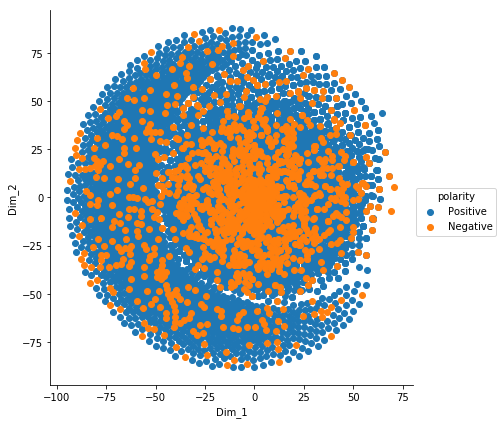

In [89]:
polarity_labels= sampled_data['Score']

# creating a new data frame which help us in ploting the result data
bow_tsne_data1 = np.vstack((bow_tsne_data.T, polarity_labels)).T
bow_tsne_df = pd.DataFrame(data=bow_tsne_data1[:,0:3], columns=("Dim_1", "Dim_2", "polarity"))

# Ploting the result of tsne
sn.FacetGrid(bow_tsne_df, hue="polarity", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

* We can see  that there is no clear separation between positive and negative reviews in this sample data
* Although we see negative reviews grouped in the middle, but they may have overlapped with positive reviews

#### TF-IDF with TSNE

In [95]:
## To avoid Out of Memory error, let's sample some rows and try on the sample data
sampled_data_tf_idf=final_data[['Score','CleanedText']].sample(5000)

In [96]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(sampled_data_tf_idf['CleanedText'].values)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (5000, 160456)
the number of unique words including both unigrams and bigrams  160456


In [97]:
standardized_data_tf_idf = StandardScaler(with_mean=False).fit_transform(final_tf_idf) 
##with_mean=False because of sparse matrix as per the docs

In [98]:
tf_idf_model = TSNE(n_components=2, random_state=0)
tf_idf_tsne_data = tf_idf_model.fit_transform(standardized_data_tf_idf.toarray())

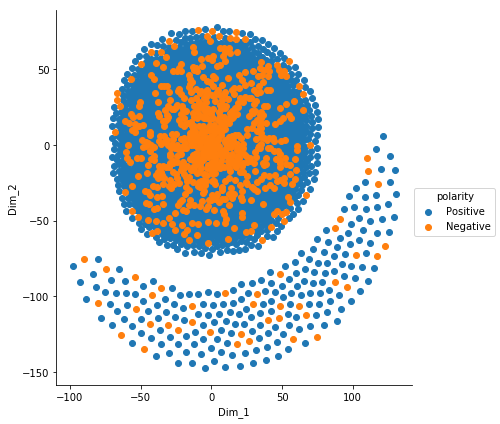

In [99]:
polarity_labels_tf_idf= sampled_data_tf_idf['Score']

# creating a new data frame which help us in ploting the result data
tf_idf_tsne_data1 = np.vstack((tf_idf_tsne_data.T, polarity_labels_tf_idf)).T
tf_idf_tsne_df = pd.DataFrame(data=tf_idf_tsne_data1[:,0:3], columns=("Dim_1", "Dim_2", "polarity"))

# Ploting the result of tsne
sn.FacetGrid(tf_idf_tsne_df, hue="polarity", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

* TF-IDF with Bi Grams gives us two distinct clusters. Both clusters have postive and negative review points
* We see that in cluster 1 the negative points are mostly concentrated around the center
* In cluster 2 the negative points are few but are spread all over 
* This sample of data does not give a clear separation of review polarity

####  TSNE with Avg Word2Vec

In [102]:
## We will train the Word2Vec model on our Corpus

sent_split=[sent.split() for sent in final_data['CleanedText'].values]
print(sent_split[0])

['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whales', 'india', 'droop', 'rose', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'all', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [103]:
## Train a Word2Vec model with dimension 50. Consider words with min frequency 5.
w2vModel=Word2Vec(sent_split,min_count=5,size=50,workers=2)

In [105]:
w2v_words = list(w2vModel.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  37855
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'india', 'droop', 'rose', 'love', 'new', 'word', 'introduc', 'silli', 'all', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'books', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'them', 'too', 'however', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem']


In [108]:
w2vModel.wv.most_similar('love')

[('ador', 0.756167471408844),
 ('enjoy', 0.7538975477218628),
 ('loves', 0.6349353194236755),
 ('lov', 0.6150979995727539),
 ('likes', 0.6063269972801208),
 ('like', 0.6058025360107422),
 ('hate', 0.6028639078140259),
 ('luv', 0.5879397392272949),
 ('favorit', 0.5870716571807861),
 ('awesome', 0.5820487141609192)]

In [112]:
## Now we will find the avg word vector for each sentence.
## i.e. for each sentence we will add the word vectors of all words and then divide by count of words

avg_sent_vectors=[]
#cnt_words=[]

for sent in sent_split:
    cnt_words=0
    sent_vec=np.zeros(50)
    for word in sent:
        if word in w2v_words:
            word_vec=w2vModel.wv[word]
            cnt_words+=1
            sent_vec+=word_vec
    if cnt_words !=0:
        sent_vec/=cnt_words
    avg_sent_vectors.append(sent_vec)

print(len(avg_sent_vectors))
print(len(avg_sent_vectors[0]))

364171
50


In [132]:
standardized_data_w2v = StandardScaler().fit_transform(avg_sent_vectors) 
##standardise data 

In [135]:
w2v_model = TSNE(n_components=2, random_state=0,perplexity=10)
w2v_tsne_data = w2v_model.fit_transform(standardized_data_w2v)

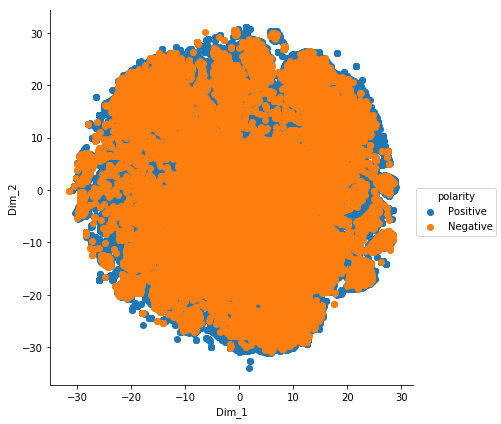

In [136]:
polarity_labels_w2v= final_data['Score']

# creating a new data frame which help us in ploting the result data
w2v_tsne_data1 = np.vstack((w2v_tsne_data.T, polarity_labels_w2v)).T
w2v_tsne_df = pd.DataFrame(data=w2v_tsne_data1, columns=("Dim_1", "Dim_2", "polarity"))
#print(w2v_tsne_df.head)

# Ploting the result of tsne
sn.FacetGrid(w2v_tsne_df, hue="polarity", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

* With Perplexity 10 , we get a decent TSNE plot which suggests that the psoitive and negative points overlap and there is no clear separation.
* This TSNE plot is based on entire data.

####  TSNE with TF-IDF weighted Word2Vec

In [221]:
## Create TF-IDF vector with unigrams on sample dataset
tf_idf_vect1 = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf1 = tf_idf_vect1.fit_transform(sampled_data_tf_idf['CleanedText'].values)
print("the type of count vectorizer ",type(final_tf_idf1))
print("the shape of out text TFIDF vectorizer ",final_tf_idf1.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf1.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (5000, 14288)
the number of unique words including both unigrams and bigrams  14288


In [222]:
features = tf_idf_vect1.get_feature_names()
print("some sample features(unique words in the corpus)",features[0:100])

some sample features(unique words in the corpus) ['00', '000', '001', '00493', '00the', '01', '02', '02027c', '033', '040', '05', '06', '07', '08', '09', '095', '0clock', '0g', '0gcholesterol', '0mg', '0z', '10', '100', '1000', '100k', '100mg', '1030', '1050', '1054', '1056', '106', '1072', '1073', '1074', '1076', '1077', '1078', '1079', '1080', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1095', '1096', '1099', '10g', '10gprotein', '10gram', '10grms', '10i', '10lb', '10lbs', '10mo', '10oz', '11', '110', '1100', '1101', '1103', '115mg', '11gm', '11lb', '11thmi', '12', '120', '1200', '120mg', '123', '125g', '125gmarmit', '128', '128g', '12g', '12i', '12in', '12oz', '12pk', '12second', '12the', '12x18', '12yo', '13', '130', '1349143571', '139', '13g', '13x9', '14', '140', '142', '144']


In [223]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect1.get_feature_names() # tfidf words/col-names

In [224]:
## Clean '-' from sentences

def clean_wrd(wrd):
    cleanhash=re.compile('-')
    cleanwrd=re.sub(cleanhash,'',wrd)
    return cleanwrd

In [225]:
sent_split_w2v=[sent.split() for sent in sampled_data_tf_idf['CleanedText'].values]
print(sent_split_w2v[0])

['soup', 'delicious', 'ive', 'made', '3', 'cup', 'water', 'couldnt', 'better', 'opinion']


In [226]:
## Using the Code Snippet from AAIC TSNE Notebook

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in sent_split_w2v: # for each review/sentence 
    sent=[word for word in sent if word !='-'] ## replace occurence of '-'
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        word=clean_wrd(word)
        if word in w2v_words:
            vec = w2vModel.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            try:
                tf_idf = final_tf_idf1[row, tfidf_feat.index(word)]
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
            except:
                continue
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [227]:
len(tfidf_sent_vectors)

5000

In [228]:
standardized_data_w2v_tfidf = StandardScaler().fit_transform(tfidf_sent_vectors) 
##standardise data 

In [229]:
w2v_model_tfidf = TSNE(n_components=2, random_state=0,perplexity=10)
w2v_tsne_data_tfidf = w2v_model_tfidf.fit_transform(standardized_data_w2v_tfidf)

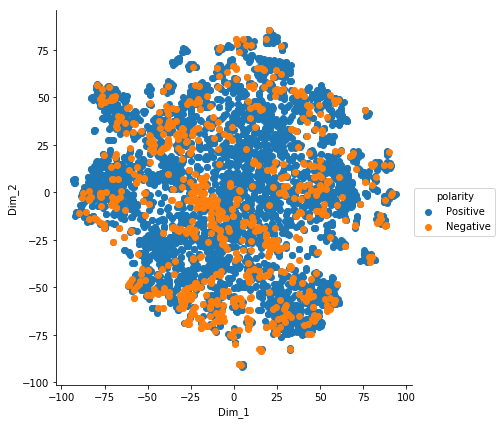

In [230]:
polarity_labels_w2v_tfidf= sampled_data_tf_idf['Score']

# creating a new data frame which help us in ploting the result data
w2v_tsne_data2 = np.vstack((w2v_tsne_data_tfidf.T, polarity_labels_w2v_tfidf)).T
w2v_tsne_df2 = pd.DataFrame(data=w2v_tsne_data2, columns=("Dim_1", "Dim_2", "polarity"))
#print(w2v_tsne_df.head)

# Ploting the result of tsne
sn.FacetGrid(w2v_tsne_df2, hue="polarity", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

*  TSNE plot of w2V with Tf-Idf on sample data of 5K points
* We can see that both the polarities are intermingled and there is no clear separation between them

### Conclusion

* All the variants of TSNE plots show that we do not have a clear separation between positive and negative reviews points
* Most TSNE Plots were created using sample of data because of limited resources. TSNE on full data might reveal a different picture. (Avg W2V TSNE plot was created on entire data, but was not any different !!)